Tải về tập dữ liệu flickr8k đã clean

In [1]:
!git clone https://github.com/DoanNgocToan/clean_data_flickr8k

Cloning into 'clean_data_flickr8k'...
remote: Enumerating objects: 8123, done.
remote: Total 8123 (delta 0), reused 0 (delta 0), pack-reused 8123 (from 2)
Receiving objects: 100% (8123/8123), 1.03 GiB | 35.27 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (8095/8095), done.


In [2]:
!ls /content/clean_data_flickr8k/

captions.txt  Images  README.md  vocabulary.txt


In [3]:
import os
from collections import defaultdict
from IPython.display import display, Image

dataset_path = '/content/clean_data_flickr8k'
caption_path = os.path.join(dataset_path, 'captions.txt')
image_dirs = os.path.join(dataset_path, 'Images')

# Create a directory to save image paths and captions
image_caption = defaultdict(list)
image_paths = set()
vocab_set = set()
cnt = [0] * 40 # Thống kê số lượng ảnh có cùng số từ trong nhãn (captions)
# Các thông số cần thiết
caption_counts = 0 # Số lượng caption
max_lengths =  0  # Độ dài của nhãn dài nhất
# Read the text file

if os.path.exists(caption_path):
  with open(caption_path, 'r') as f:
    next(f) # Bỏ qua tiêu đề 'image,caption'
    for line in f:
      # Split only at the first comma to correctly separate image and caption
      dir_cap = line.strip().split(',', 1)
      image_path = os.path.join(image_dirs, dir_cap[0])
      image_paths.add(image_path)
      if os.path.exists(image_path):
        image_caption[image_path].append(dir_cap[1])

Tìm hiểu dữ liệu && Tiền xử lý (Toàn)
Thiết kế mô hình



In [8]:
import re
from collections import defaultdict

# Khởi tạo lại các biến cho việc làm sạch
cleaned_vocab_set = set()
cleaned_max_lengths = 0
cleaned_image_caption = defaultdict(list)
cleaned_max_lengths_image_path = "";
cleaned_max_lengths_caption = "";

# Thực hiện làm sạch dữ liệu từ image_caption và image_paths đã có
for path in image_paths:
    if path not in image_caption:
        continue
    for caption in image_caption[path]:
        cleaned_words_for_caption = []
        raw_words = caption.split()
        for word in raw_words:
          # Loại bỏ các dấu câu thường gặp trong captions
            cleaned_word = word.strip("'.,!#():;?&- ").strip('"').lower()
            if cleaned_word:
                cleaned_words_for_caption.append(cleaned_word)

        # Gộp các từ đã làm sạch lại thành một caption và thêm vào cleaned_image_caption
        cleaned_caption_string = ' '.join(cleaned_words_for_caption)
        if cleaned_caption_string: # Only add non-empty cleaned captions
            cleaned_image_caption[path].append(cleaned_caption_string)

        # Update max_lengths based on the length of cleaned words
        if cleaned_max_lengths < len(cleaned_words_for_caption):
           cleaned_max_lengths = len(cleaned_words_for_caption)
           cleaned_max_lengths_caption = cleaned_caption_string;
           cleaned_max_lengths_image_path = path;

        # Update cleaned_vocab_set with cleaned words
        cleaned_vocab_set.update(cleaned_words_for_caption)

# In thống kê sau khi làm sạch nhẹ
print("\n--- Thống kê sau khi làm sạch nhẹ (loại bỏ \".,'!#():;?) ---")
print(f"Kích thước từ vựng sau làm sạch: {len(cleaned_vocab_set)}")
print(f"Độ dài caption dài nhất sau làm sạch: {cleaned_max_lengths}")
print(f"Đường dẫn image chứa caption dài nhất: {cleaned_max_lengths_image_path}")
print(f"Nội dung caption dài nhất: {cleaned_max_lengths_caption}")

# --- Tìm và in các từ chứa ký tự không phải chữ cái hoặc số ---
print("\nCác từ trong từ vựng SAU LÀM SẠCH chứa ký tự không phải chữ cái hoặc số:")
non_alphanum_words_cleaned = []
for word in sorted(list(cleaned_vocab_set)): # Sort for consistent output
    # Check if the word contains any character that is NOT a letter or a digit
    if re.search(r'[^a-z0-9-]', word): # Dấu '-' cuối là để loại các từ ghép có dấu gạch nối
        non_alphanum_words_cleaned.append(word)

if non_alphanum_words_cleaned:
    for word in non_alphanum_words_cleaned:
        print(word)
else:
    print("Không có từ nào trong từ vựng sau làm sạch chứa ký tự không phải chữ cái hoặc số.")


--- Thống kê sau khi làm sạch nhẹ (loại bỏ ".,'!#():;?) ---
Kích thước từ vựng sau làm sạch: 8455
Độ dài caption dài nhất sau làm sạch: 36
Đường dẫn image chứa caption dài nhất: /content/clean_data_flickr8k/Images/2354456107_bf5c766a05.jpg
Nội dung caption dài nhất: an african-american man wearing a green sweatshirt and blue vest is holding up 2 dollar bills in front of his face while standing on a busy sidewalk in front of a group of men playing instruments

Các từ trong từ vựng SAU LÀM SẠCH chứa ký tự không phải chữ cái hoặc số:
at&t
avrovulcan.com
d.c
n't
o'clock
r.v
s.c.u.b.a
statefarm.com


Total number of images in directory: 8091

Cleaned Captions structure (first 5 rows):


,image,caption
0,3582066525_e9d6377f56.jpg,a boy is cliff jumping into the ocean
1,3582066525_e9d6377f56.jpg,a man is jumping from a rock into the ocean wh...
2,3582066525_e9d6377f56.jpg,a man jumping off a cliff into water
3,3582066525_e9d6377f56.jpg,a man jumping off of a large rock into the ocean
4,3582066525_e9d6377f56.jpg,a person jumps off of a cliff into the water b...


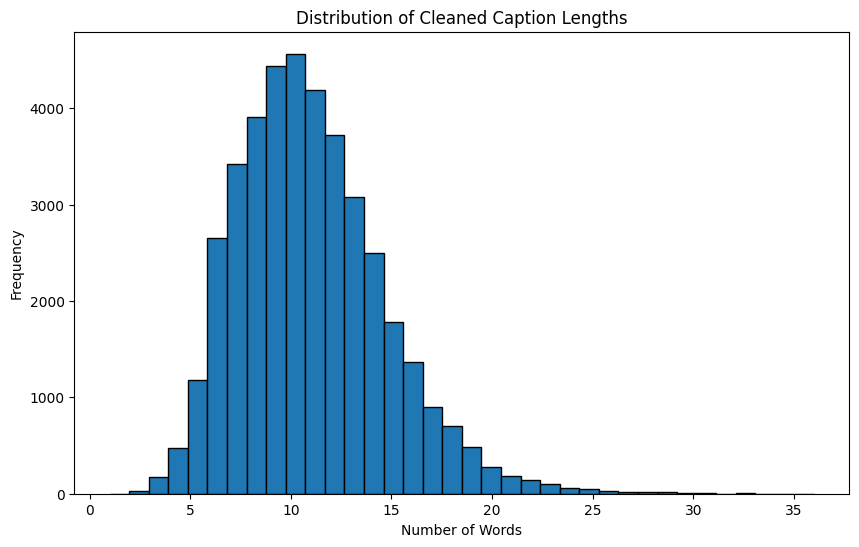


Average cleaned caption length: 10.79 words
Maximum cleaned caption length: 36 words
Minimum cleaned caption length: 1 words
Median cleaned caption length: 10.0 words


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Determine the total number of images (based on actual image files in directory)
# The `image_dirs` and `dataset_path` are defined in an earlier cell (OXMj5ZgecJ71)
image_files = [f for f in os.listdir(image_dirs) if os.path.isfile(os.path.join(image_dirs, f))]
num_images = len(image_files)
print(f"Total number of images in directory: {num_images}")

# 2. Analyze the structure of the cleaned captions
# Create a DataFrame from cleaned_image_caption for easier manipulation
data_for_df = []
for image_path_full, captions in cleaned_image_caption.items():
    image_filename = os.path.basename(image_path_full)
    for caption_text in captions:
        data_for_df.append({'image': image_filename, 'caption': caption_text})

cleaned_captions_df = pd.DataFrame(data_for_df)

print("\nCleaned Captions structure (first 5 rows):")
display(cleaned_captions_df.head())

# 3. Calculate and visualize the distribution of cleaned caption lengths
cleaned_captions_df['caption_length'] = cleaned_captions_df['caption'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(cleaned_captions_df['caption_length'], bins=cleaned_max_lengths, edgecolor='black')
plt.title('Distribution of Cleaned Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

print(f"\nAverage cleaned caption length: {cleaned_captions_df['caption_length'].mean():.2f} words")
print(f"Maximum cleaned caption length: {cleaned_captions_df['caption_length'].max()} words")
print(f"Minimum cleaned caption length: {cleaned_captions_df['caption_length'].min()} words")
print(f"Median cleaned caption length: {cleaned_captions_df['caption_length'].median()} words")


📊 TỔNG KẾT DATASET FLICKR8K
-------------------------------------
📦 Tổng số ảnh (image_paths): 8091
✅ Số ảnh đọc hợp lệ: 8091
❌ Số ảnh lỗi hoặc không tồn tại: 0
-------------------------------------
📏 Chiều rộng trung bình  : 457.87
📐 Chiều cao trung bình   : 397.25
-----------------------------------------------
Tỷ lệ nhỏ nhất  : 0.328
Tỷ lệ lớn nhất  : 3.937
Tỷ lệ trung bình: 1.220


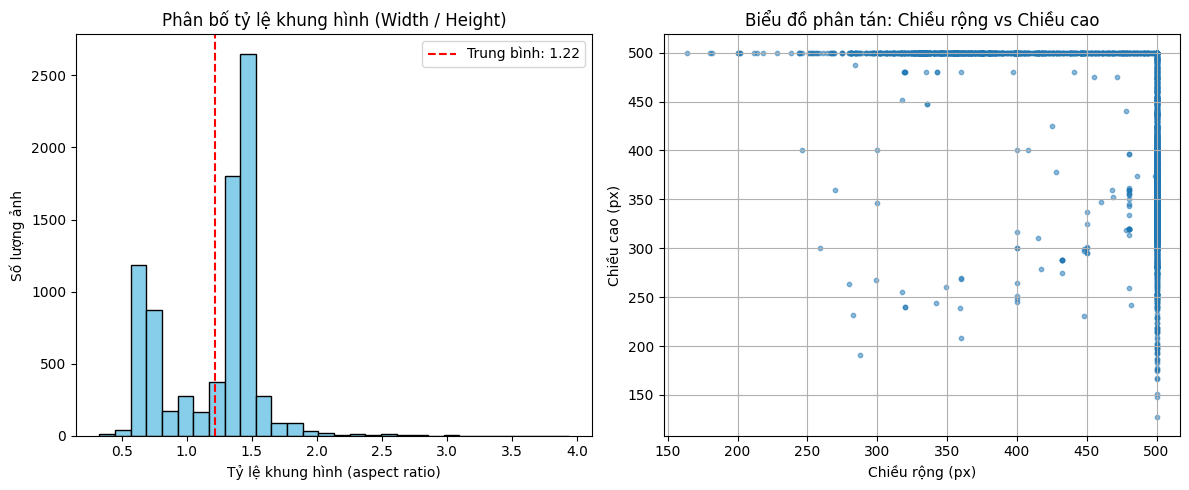

In [ ]:
from PIL import Image
import numpy as np

# Tổng số ảnh có trong danh sách
total_images = len(image_paths)
valid_images = 0
invalid_images = 0

image_sizes = []

# Đọc kích thước tất cả ảnh
for path in image_paths:
    try:
        with Image.open(path) as img:
            width, height = img.size
            image_sizes.append((path, width, height))
            valid_images += 1
    except Exception as e:
        print(f"⚠️ Không thể đọc {path}: {e}")
        invalid_images += 1

# Nếu có ảnh hợp lệ
if image_sizes:
    # Chuyển thành numpy array để dễ tính toán
    widths = np.array([w for _, w, _ in image_sizes])
    heights = np.array([h for _, _, h in image_sizes])

    # Trung bình
    mean_width = np.mean(widths)
    mean_height = np.mean(heights)

    # Tỷ lệ khung hình = width / height
    aspect_ratios = widths / heights

    # Thống kê
    mean_aspect = np.mean(aspect_ratios)
    min_aspect = np.min(aspect_ratios)
    max_aspect = np.max(aspect_ratios)

    print("\n📊 TỔNG KẾT DATASET FLICKR8K")
    print("-------------------------------------")
    print(f"📦 Tổng số ảnh (image_paths): {total_images}")
    print(f"✅ Số ảnh đọc hợp lệ: {valid_images}")
    print(f"❌ Số ảnh lỗi hoặc không tồn tại: {invalid_images}")

    print("-------------------------------------")
    print(f"📏 Chiều rộng trung bình  : {mean_width:.2f}")
    print(f"📐 Chiều cao trung bình   : {mean_height:.2f}")

    print("-----------------------------------------------")
    print(f"Tỷ lệ nhỏ nhất  : {min_aspect:.3f}")
    print(f"Tỷ lệ lớn nhất  : {max_aspect:.3f}")
    print(f"Tỷ lệ trung bình: {mean_aspect:.3f}")

    # --- Biểu đồ phân bố aspect ratio ---
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(aspect_ratios, bins=30, color='skyblue', edgecolor='black')
    plt.title("Phân bố tỷ lệ khung hình (Width / Height)")
    plt.xlabel("Tỷ lệ khung hình (aspect ratio)")
    plt.ylabel("Số lượng ảnh")
    plt.axvline(mean_aspect, color='red', linestyle='--', label=f"Trung bình: {mean_aspect:.2f}")
    plt.legend()

    # --- Biểu đồ scatter width vs height ---
    plt.subplot(1, 2, 2)
    plt.scatter(widths, heights, alpha=0.5, s=10)
    plt.title("Biểu đồ phân tán: Chiều rộng vs Chiều cao")
    plt.xlabel("Chiều rộng (px)")
    plt.ylabel("Chiều cao (px)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Chưa có dữ liệu image_sizes — hãy chạy cell phân tích kích thước ảnh trước.")



Tiền xử lý dữ liệu, chuẩn bị cho training
1.  Padding câu cho bằng độ dài (ở đây là độ dài của câu dài nhất)
2.  Đánh chỉ mục các từ trong vocabulary
3.  Chuẩn hóa kích thước của ảnh để đưa vào CNN
4.  Data Augmenting




In [ ]:
import cv2
from tqdm import tqdm

# ==========================
# Cấu hình đường dẫn
# ==========================
input_dir = image_dirs
output_dir = os.path.join(dataset_path, "ResizedImages")
os.makedirs(output_dir, exist_ok=True)

target_size = (224, 224)

# ==========================
# Hàm resize không padding
# ==========================
def resize_exact(img, target_size=(224, 224)):
    """
    Resize ảnh về đúng kích thước target_size mà không padding,
    có thể bị méo nếu tỉ lệ gốc khác với target_size.
    """
    return cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

# ==========================
# Duyệt và xử lý tất cả ảnh
# ==========================
sample_images = []  # lưu vài ảnh để hiển thị so sánh

for filename in tqdm(os.listdir(input_dir)):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_dir, filename)
        out_path = os.path.join(output_dir, filename)

        img = cv2.imread(img_path)
        if img is None:
            continue

        resized_img = resize_exact(img, target_size)
        cv2.imwrite(out_path, resized_img)

        # Lưu vài ảnh để hiển thị so sánh
        if len(sample_images) < 5:
            sample_images.append((img, resized_img, filename))

print(f"✅ Đã xử lý {len(os.listdir(output_dir))} ảnh và lưu tại {output_dir}")

# ==========================
# Hiển thị so sánh ảnh trước & sau
# ==========================
fig, axes = plt.subplots(len(sample_images), 2, figsize=(8, 4 * len(sample_images)))

for i, (orig, resized, name) in enumerate(sample_images):
    axes[i, 0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f"Ảnh gốc: {name}\n{orig.shape[1]}x{orig.shape[0]}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(f"Ảnh sau resize\n{resized.shape[1]}x{resized.shape[0]}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Image augmenting

In [ ]:
import os

# Define the output directory for augmented images
augmented_output_dir = os.path.join(dataset_path, "AugmentedImages")

# Create the directory if it doesn't exist
os.makedirs(augmented_output_dir, exist_ok=True)

print(f"Created directory for augmented images: {augmented_output_dir}")

Created directory for augmented images: /content/clean_data_flickr8k/AugmentedImages


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    fill_mode='nearest'
)

In [ ]:
import cv2
import os
from tqdm import tqdm
import numpy as np

# Input directory for resized images (already defined as output_dir in previous step)
input_augmented_dir = output_dir # '/content/clean_data_flickr8k/ResizedImages'

# Output directory for augmented images (already defined)
output_augmented_dir = augmented_output_dir # '/content/clean_data_flickr8k/AugmentedImages'

# Initialize a counter for augmented images
augmented_count = 0

# Get list of image files from the resized directory
resized_image_files = [f for f in os.listdir(input_augmented_dir) if f.lower().endswith(('.jpg'))]

print(f"Starting augmentation for {len(resized_image_files)} images...")

for filename in tqdm(resized_image_files):
    img_path = os.path.join(input_augmented_dir, filename)

    # Read the image
    img = cv2.imread(img_path)

    if img is None:
        # print(f"Warning: Could not read image {img_path}. Skipping.")
        continue

    # Convert BGR to RGB (ImageDataGenerator expects RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Add batch dimension: (height, width, channels) -> (1, height, width, channels)
    img_rgb_expanded = np.expand_dims(img_rgb, axis=0)

    # Apply one random transformation
    augmented_img_array = datagen.random_transform(img_rgb_expanded[0])

    # Convert back to uint8 and remove batch dimension (if it somehow got added back by random_transform, though it shouldn't)
    # datagen.random_transform returns an array with the same dimensions as the input image (without batch dim)
    augmented_img_array = augmented_img_array.astype('uint8')

    # Convert augmented image back to BGR for saving with cv2
    augmented_img_bgr = cv2.cvtColor(augmented_img_array, cv2.COLOR_RGB2BGR)

    # Construct the output path
    output_path = os.path.join(output_augmented_dir, filename)

    # Save the augmented image
    cv2.imwrite(output_path, augmented_img_bgr)

    augmented_count += 1

print(f"\n✅ Successfully augmented and saved {augmented_count} images to {output_augmented_dir}")


Starting augmentation for 8091 images...


100%|██████████| 8091/8091 [02:01<00:00, 66.69it/s]


✅ Successfully augmented and saved 8091 images to /content/clean_data_flickr8k/AugmentedImages


Total number of augmented images saved: 8091

Displaying a few random augmented images:


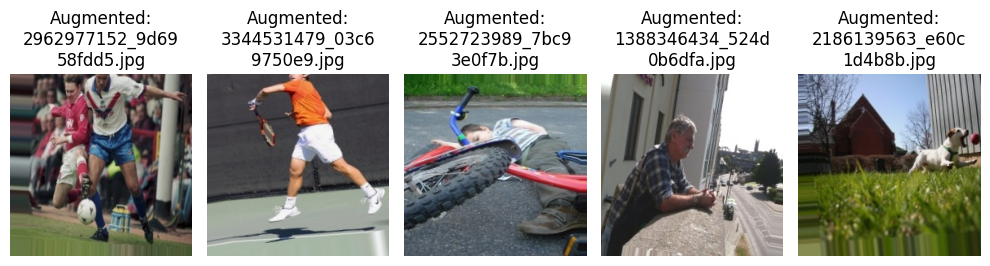

In [ ]:
import random
import matplotlib.pyplot as plt
import textwrap

# 1. Verify the number of augmented images saved
augmented_image_files = [f for f in os.listdir(augmented_output_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
num_augmented_images = len(augmented_image_files)
print(f"Total number of augmented images saved: {num_augmented_images}")

if num_augmented_images == 0:
    print("No augmented images found in the directory. Please check the previous step.")
else:
    # 2. Display a few examples of augmented images
    print("\nDisplaying a few random augmented images:")
    plt.figure(figsize=(10, 8))
    for i in range(min(5, num_augmented_images)): # Display up to 5 random images
        random_filename = random.choice(augmented_image_files)
        img_path = os.path.join(augmented_output_dir, random_filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img_rgb)
            # Wrap the filename to prevent overlap
            wrapped_filename = textwrap.fill(random_filename, width=15) # Adjust width as needed
            plt.title(f"Augmented:\n{wrapped_filename}")
            plt.axis('off')
        else:
            print(f"Warning: Could not read augmented image {random_filename}")
    plt.tight_layout()
    plt.show()

## Padding và Đánh Chỉ Số Cho Nhãn

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ============================
# 1. Thêm các token đặc biệt vào từ vựng
# ============================
# Tạo một bản sao của tập từ vựng đã làm sạch
vocabulary_for_tokenizer = set(cleaned_vocab_set)

# Thêm các token đặc biệt
vocabulary_for_tokenizer.add('<start>')
vocabulary_for_tokenizer.add('<end>')
vocabulary_for_tokenizer.add('<pad>')

# Chuyển set thành list để truyền vào Tokenizer
vocabulary_list = sorted(list(vocabulary_for_tokenizer))

# ============================
# 2. Khởi tạo Tokenizer và xây dựng chỉ mục từ
# ============================
# num_words: None (giữ tất cả các từ), oov_token: đại diện cho các từ không có trong từ vựng
tokenizer = Tokenizer(num_words=None, oov_token='<unk>')

# Fit trên tập các từ vựng đã bao gồm các token đặc biệt
tokenizer.fit_on_texts(vocabulary_list)

# Đảm bảo các token đặc biệt có chỉ mục cố định và là các chỉ mục thấp nhất
# (thường tokenizer tự làm điều này nếu chúng được thêm vào và fit_on_texts)
# Tuy nhiên, nếu muốn đảm bảo, có thể chỉnh sửa word_index sau khi fit.
# Ví dụ: nếu '<pad>' thường được gán chỉ mục 0 bởi pad_sequences, ta có thể bỏ qua.
# Keras pad_sequences mặc định padding_value=0, nên ta cần đảm bảo <pad> = 0 hoặc điều chỉnh padding_value.
# Ở đây, ta sẽ giả định tokenizer gán chỉ mục từ 1 trở đi, và pad_sequences sẽ dùng 0 cho padding.

# Gán lại chỉ mục cho các token đặc biệt nếu cần để đảm bảo tính nhất quán
# Đây là một bước tùy chọn, tùy thuộc vào yêu cầu cụ thể về chỉ mục của các token đặc biệt.
# Trong nhiều trường hợp, việc để tokenizer tự động gán là đủ.
# Để đảm bảo <pad> là 0, chúng ta cần xây dựng word_index thủ công hoặc điều chỉnh sau.
# Cách đơn giản nhất là để pad_sequences thêm 0 và sử dụng các chỉ mục khác cho các từ.
# Tokenizer tự động gán 1 cho từ phổ biến nhất, 2 cho từ phổ biến thứ 2, v.v.
# OOV_token sẽ nhận chỉ mục cuối cùng (num_words+1 nếu num_words được set)

# Để đảm bảo <pad> là 0, chúng ta sẽ xây dựng lại `word_index` một cách thủ công hoặc điều chỉnh nó.
word_index = tokenizer.word_index
# Tạo word_index mới với <pad> = 0, <start> = 1, <end> = 2, <unk> = 3 (hoặc các giá trị khác)
# Sau đó gán các từ còn lại.

# Reset tokenizer để xây dựng thủ công
tokenizer = Tokenizer(num_words=None, oov_token='<unk>')

# Tạo từ điển chỉ mục thủ công để đảm bảo vị trí các token đặc biệt
# Note: Keras Tokenizer mặc định các chỉ mục từ 1 trở đi. 0 được giữ cho padding.
# Nếu bạn muốn <pad> có chỉ mục 0, thì các từ khác sẽ bắt đầu từ 1.
# Chúng ta sẽ để Keras làm phần lớn, chỉ đảm bảo các token đặc biệt được xử lý.
# Thêm các token đặc biệt vào đầu danh sách từ vựng để chúng có chỉ mục thấp.
# Nhưng tốt nhất là để Tokenizer tự học và sau đó điều chỉnh (hoặc sử dụng một mapping khác).

# Để đơn giản, ta sẽ để tokenizer tạo word_index và sau đó điều chỉnh index_word và word_index
# nếu muốn chỉ mục 0 là <pad>. Hoặc đơn giản hơn, thêm nó vào tập từ vựng và để tokenizer gán chỉ mục.
# Tokenizer sẽ gán chỉ mục từ 1 trở đi cho các từ, giữ 0 cho padding.
# OOV token sẽ có chỉ mục dựa trên số lượng từ. Để đơn giản, ta sẽ thêm các token này vào trước khi fit.

# Cách phổ biến là tạo thủ công một số chỉ mục đầu tiên cho các token đặc biệt
# và sau đó thêm các từ còn lại.

# Danh sách các từ có thể xuất hiện trong captions, bao gồm các token đặc biệt.
all_words = ['<pad>', '<start>', '<end>', '<unk>'] + sorted(list(cleaned_vocab_set))

# Khởi tạo lại tokenizer
tokenizer = Tokenizer(filters='', lower=True, split=' ', oov_token='<unk>')
tokenizer.fit_on_texts(all_words)

# Điều chỉnh word_index và index_word để <pad> là 0, <start> là 1, <end> là 2, <unk> là 3
# Keras Tokenizer tự động bỏ qua 0 cho padding, nên chỉ mục sẽ bắt đầu từ 1.
# Để đảm bảo, chúng ta sẽ hoán đổi nếu cần hoặc gán thủ công.
# Mặc định, tokenizer sẽ gán chỉ mục 1 cho từ xuất hiện nhiều nhất.
# Để đảm bảo các token đặc biệt có chỉ mục thấp, ta có thể xây dựng thủ công.

# Xây dựng thủ công word_index và index_word
word_index = {'<pad>': 0, '<start>': 1, '<end>': 2, '<unk>': 3}
index_word = {0: '<pad>', 1: '<start>', 2: '<end>', 3: '<unk>'}
current_index = 4

for word in sorted(list(cleaned_vocab_set)):
    if word not in word_index:
        word_index[word] = current_index
        index_word[current_index] = word
        current_index += 1

# Cập nhật tokenizer với word_index và index_word đã được tạo thủ công
tokenizer.word_index = word_index
tokenizer.index_word = index_word

vocab_size = len(word_index)

print(f"Kích thước từ vựng (bao gồm các token đặc biệt): {vocab_size}")
print(f"Chỉ mục của <start>: {tokenizer.word_index['<start>']}")
print(f"Chỉ mục của <end>: {tokenizer.word_index['<end>']}")
print(f"Chỉ mục của <pad>: {tokenizer.word_index['<pad>']}")
print(f"Chỉ mục của <unk>: {tokenizer.word_index['<unk>']}")

# ============================
# 3. Chuyển đổi captions thành chuỗi số và padding
# ============================
# Tạo một danh sách các chuỗi caption đã được xử lý để truyền vào tokenizer
processed_captions = []

# Xác định độ dài tối đa của caption sau khi thêm <start> và <end>
# Nó sẽ là cleaned_max_lengths + 2 (cho <start> và <end>)
max_caption_length = cleaned_max_lengths + 2

for image_path, captions in cleaned_image_caption.items():
    for caption_text in captions:
        # Thêm token <start> và <end> vào caption
        processed_caption_with_tokens = '<start> ' + caption_text + ' <end>'
        processed_captions.append(processed_caption_with_tokens)

# Chuyển đổi các caption thành chuỗi số (sequences of integers)
encoded_sequences = tokenizer.texts_to_sequences(processed_captions)

# Padding các chuỗi số để chúng có cùng độ dài tối đa
# Post-padding để các token <end> không bị mất
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_caption_length, padding='post', value=tokenizer.word_index['<pad>'])

print(f"\nSố lượng captions đã được mã hóa: {len(padded_sequences)}")
print(f"Độ dài caption tối đa (bao gồm token đặc biệt và padding): {max_caption_length}")
print("\nVí dụ về một caption gốc:", processed_captions[0])
print("Ví dụ về một caption đã được mã hóa và padding (dạng số):")
print(padded_sequences[0])

# ============================
# 4. Tạo từ điển ánh xạ file ảnh với các chuỗi số của caption
# ============================
image_to_padded_sequences = {}
caption_index = 0

for image_path, captions in cleaned_image_caption.items():
    # Lấy ra các sequences đã được padding tương ứng với các captions của ảnh này
    num_captions_for_image = len(captions)
    image_to_padded_sequences[image_path] = padded_sequences[caption_index : caption_index + num_captions_for_image]
    caption_index += num_captions_for_image

print(f"\nVí dụ về captions đã được padding cho một ảnh bất kỳ: {list(image_to_padded_sequences.keys())[0]}")
print(image_to_padded_sequences[list(image_to_padded_sequences.keys())[0]])

# Lưu trữ max_caption_length và vocab_size cho các bước sau
# Đây là các thông số quan trọng cho việc xây dựng mô hình
MAX_CAPTION_LENGTH = max_caption_length
VOCAB_SIZE = vocab_size


Kích thước từ vựng (bao gồm các token đặc biệt): 8459
Chỉ mục của <start>: 1
Chỉ mục của <end>: 2
Chỉ mục của <pad>: 0
Chỉ mục của <unk>: 3

Số lượng captions đã được mã hóa: 40455
Độ dài caption tối đa (bao gồm token đặc biệt và padding): 38

Ví dụ về một caption gốc: <start> a boy is cliff jumping into the ocean <end>
Ví dụ về một caption đã được mã hóa và padding (dạng số):
[   1   55  915 3807 1496 3900 3791 7518 4877    2    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]

Ví dụ về captions đã được padding cho một ảnh bất kỳ: /content/clean_data_flickr8k/Images/3582066525_e9d6377f56.jpg
[[   1   55  915 3807 1496 3900 3791 7518 4877    2    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [   1   55 4346 3807 3900 2998   55 6039 3791 7518 4877 8232 4975  308
  8127    2    0    0    0    0    0    

In [11]:
print(f"Kiểu dữ liệu của padded_sequences: {type(padded_sequences)}")
print(f"Kiểu dữ liệu của các phần tử trong padded_sequences: {padded_sequences.dtype}")

Kiểu dữ liệu của padded_sequences: <class 'numpy.ndarray'>
Kiểu dữ liệu của các phần tử trong padded_sequences: int32
